# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 131123

# Apartado 2: Recuperación de información

__Número de grupo: 10__

__Nombres de los estudiantes: Rubén Gómez, Adrián Pérez y Adrián Sanjuán__

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no lo vamos a usar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.

Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

In [2]:
import numpy as np
import pandas as pd
df_news = pd.read_csv('BBC News.csv', index_col = 0)
df_news

,Text,Category
ArticleId,,
1833,worldcom ex-boss launches defence lawyers defe...,business
154,german business confidence slides german busin...,business
1101,bbc poll indicates economic gloom citizens in ...,business
1976,lifestyle governs mobile choice faster bett...,tech
917,enron bosses in $168m payout eighteen former e...,business
...,...,...
857,double eviction from big brother model caprice...,entertainment
325,dj double act revamp chart show dj duo jk and ...,entertainment
1590,weak dollar hits reuters revenues at media gro...,business


In [3]:
by_category = df_news.groupby("Category").count()
by_category

,Text
Category,
business,336
entertainment,273
politics,274
sport,346
tech,261


In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


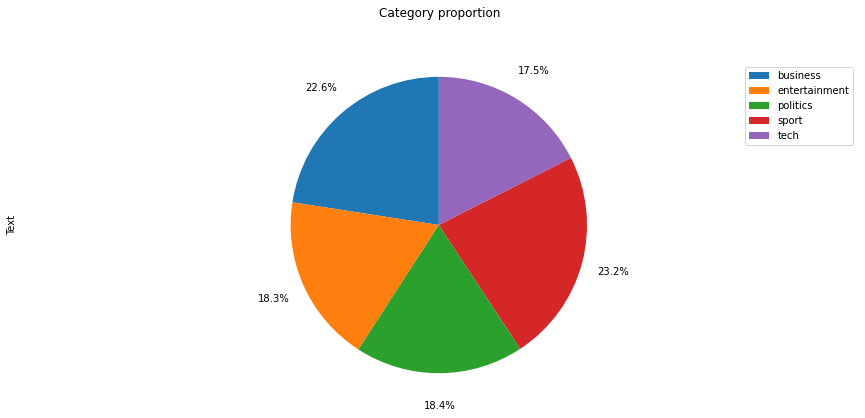

In [5]:

by_category.plot.pie(autopct='%1.1f%%',
                 figsize=(15, 6),
                 startangle=90,      
                 labels=None,         
                 pctdistance=1.22,
                    subplots = True) 
plt.title('Category proportion', y=1.12) 
plt.axis('equal') 

plt.legend(labels=by_category.index, loc='upper right') 

*Comentado en la práctica 1*

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_news, test_size = 0.2, random_state = RANDOM_STATE)
train

,Text,Category
ArticleId,,
882,uk youth interested in politics the majority...,politics
1664,robben sidelined with broken foot chelsea wing...,sport
962,stars shine on bafta red carpet hollywood star...,entertainment
1144,visa row mandarin made sir john the top civil ...,politics
1268,watchdog probes vivendi bond sale french stock...,business
...,...,...
372,us peer-to-peer pirates convicted the first co...,tech
1234,fear will help france - laporte france coach b...,sport
934,mutant book wins guardian prize a book about t...,entertainment


No handles with labels found to put in legend.


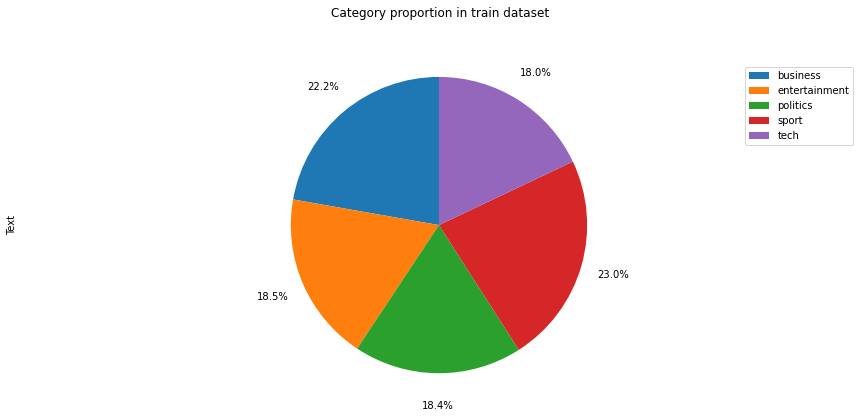

In [10]:
train.groupby("Category").count().plot.pie(autopct='%1.1f%%',
                 figsize=(15, 6),
                 startangle=90,      
                 labels=None,         
                 pctdistance=1.22,
                    subplots = True) 
plt.title('Category proportion in train dataset', y=1.12) 
plt.axis('equal') 

plt.legend(labels=train.groupby("Category").count().index, loc='upper right') 

Utilizamos la gráfica anterior para comprobar que el conjunto de entrenamiento está equilibrado en cuanto a número de instancias por categoría. A pesar de una ligera diferencia obtenemos una distribución prácticamente igual a la original, la cual consideramos que esta bien distribuida. Asimismo consideramos que el número de textos del que disponemos (1192 en test y 1490 en total) es suficientemente grande.

## 2) Representación basada en bolsa de palabras y tf-idf

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y el valor tf-idf de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y comenta las clases en las que se comporta mejor y peor. ¿Crees que los resultados son buenos?

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
vectorizer = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1), token_pattern=r'(?u)\b[A-Za-z]+\b')
# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
train_vector_data = vectorizer.fit_transform(train.Text)
test_vector_data = vectorizer.transform(test.Text)
#print(test_vector_data[5])

In [13]:
feature_names=vectorizer.get_feature_names()
print(len(feature_names))

21272


In [14]:
print(feature_names[:100])

['aa', 'aaa', 'aaas', 'aac', 'aadc', 'aaltra', 'aamir', 'aaron', 'abacus', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abating', 'abba', 'abbas', 'abbasi', 'abbott', 'abbreviated', 'abc', 'abdellatif', 'abdication', 'abdomen', 'abdominal', 'abducted', 'abduction', 'abdullah', 'abdullatif', 'abebe', 'aberdeen', 'aberration', 'aberystwyth', 'abeyance', 'abeyie', 'abhorrent', 'abi', 'abide', 'abided', 'abiding', 'abigail', 'abilities', 'ability', 'abish', 'able', 'abn', 'abnormality', 'abolish', 'abolishing', 'abolition', 'aborted', 'abortion', 'abortionist', 'abortive', 'abramovich', 'abroad', 'absa', 'absence', 'absent', 'absentee', 'absolute', 'absolutely', 'absolution', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstentions', 'absurd', 'abtahi', 'abu', 'abundance', 'abundantly', 'aburizal', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abut', 'abuzz', 'abysmal', 'ac', 'academic', 'academie', 'academies', 'academy', 'acc', 'accelerate', 'accelerated', 'ac

In [18]:
tfidftrans = TfidfTransformer()
train_preprocessed = tfidftrans.fit_transform(train_vector_data)
test_preprocessed = tfidftrans.transform(test_vector_data)

In [19]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data.iloc[index],'\n')
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [20]:
write_terms(feature_names, train.Text, train_preprocessed,598)

Mensaje 598 : blair labour s longest-serving pm tony blair has become the labour party s longest-serving prime minister.  the 51-year-old premier has marked his 2 838th day in the post  overtaking the combined length of harold wilson s two terms during the 1960s and 1970s. if mr blair wins the next election and fulfils his promise to serve a full third term  he will surpass margaret thatcher s 11 years by the end of 2008. in 1997  mr blair became the youngest premier of the 20th century  when he came to power at the age of 43. the last prime minister to be installed at a younger age was lord liverpool  who was a year his junior in 1812.  mr blair s other political firsts include becoming the first labour leader to win two successive full terms in power after the 2001 labour landslide. and the birth of the blairs  fourth child  leo  on 20 may  2000  was the first child born to a serving prime minister in more than 150 years. the last  downing street dad  was lord john russell in 1848. l

En el mensaje original existen muchos términos numéricos o alfanuméricos que aportarían mucho ruido a la vecotrización del propio texto, razón por la que se han eliminado. También se han eliminado las _stop_words_ del inglés como 'to' o 'the' por el mismo motivo.

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

def knn(query, X_train, k):
    '''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando 
    la similitud del coseno.
    
    Parámetros:
    - query: documento consulta vectorizado
    - X_train: documentos de entrenamiento vectorizados
    - k: número de documentos a recuperar
    
    Devuelve:
    - índices de los k documentos más similares a la consulta.
    '''
    
    # Necesitamos un vector de dimensión (1, X). Si se pasa un vector de dimensión X, transformarlo
    if len(query.shape) == 1:
        query = query.reshape(1, -1)

    simil = cosine_similarity(query, X_train)
    simil_idx = np.argsort(simil.flatten())
    simil_idx = simil_idx[::-1]
    return simil_idx[:k]

In [22]:
def precision_at_k(y_selected, y_real, k):
    '''Devuelve la precisión @k de los documentos seleccionados.
    
    Parametros:
    - y_selected: etiquetas de los documentos seleccionados (se usan los k primeros)
    - y_real: etiqueta de la categoría correcta
    - k: número de documentos que se tienen en cuenta
    
    Devuelve:
    - Precisión@k
    '''
    
    return np.sum(y_selected[:k] == y_real) / k * 100

In [23]:
def mean_precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k media para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión en tanto por ciento.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        
    # Calcular medias
    for y in y_precisions:
        y_precisions[y] = np.mean(y_precisions[y])
    
    return y_precisions

In [26]:
p5 = mean_precisions_per_class(train_preprocessed,train.Category, test_preprocessed, test.Category, 5)
p5

{'business': 80.28169014084507,
 'entertainment': 76.98113207547169,
 'politics': 91.27272727272727,
 'sport': 98.61111111111111,
 'tech': 88.51063829787235}

<AxesSubplot:xlabel='Category'>

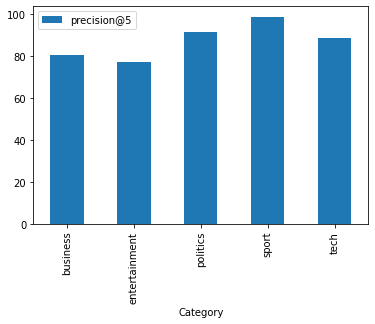

In [27]:
import pandas as pd

test_category_names=['business', 'entertainment', 'politics', 'sport', 'tech']

df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])

df_p5["Category"] =  test_category_names

d = df_p5.set_index("Category")

d.plot.bar()

Se puede apreciar en la tabla que la precisión a la hora de recuperar textos de la misma categoría es más alta para el caso de 'sport' para la cual es del 97.26%. La precisión para las categorías 'politics' y 'tech' ronda el 90%, mientras que para 'business' está en un 80.28%. Los textos que el modelo recupera con peor precisión son los de 'entertainment' con una precisión por debajo del 77%.

Los resultados cuadran bastante con lo observado en la primera práctica. 'Sports' es la categoría que se diferencia más de las demás en cuanto a vocabulario utilizado, por lo que el modelo es más preciso a la hora de recuperar textos similares de esta categoría. Por otro lado, el resto de categorías las confunde entre sí con más frecuencia, especialmente en el caso de 'entertainment', que es una categoría que puede intersecar con varios temas más frecuentemente.

El modelo ofrece una aproximación relativamente buena del problema que queremos resolver ya que casi todas las categorías se recuperan con un porcentaje en torno al 80% o supertior en algunos casos. Sin embargo, opinamos que para que el modelo sea realmente útil en un caso real, la precisión para todas las categorías debería ser mucho más alta estando en torno a un un 95% mínimo.

## 3) Representación basada en word-embeddings y tf-idf

La segunda vectorización que vamos a usar representará los mensajes usando word-embeddings usando como pesos la frecuencia de aparición de cada palabra. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test.

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y compara los resultados con los del apartado anterior.

In [29]:
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

globe_file='glove.6B.50d.txt'
model = KeyedVectors.load_word2vec_format(globe_file, binary=False, no_header=True)

In [30]:
we_vocabulary = list(model.key_to_index.keys())
vectorizer_2 = CountVectorizer(vocabulary = we_vocabulary, ngram_range=(1,1), stop_words='english', binary = False)

In [31]:
train_vector_data_2=vectorizer_2.fit_transform(train.Text) 
test_vector_data_2=vectorizer_2.transform(test.Text)

In [32]:
tfidftrans = TfidfTransformer()
train_preprocessed_2 = tfidftrans.fit_transform(train_vector_data_2)
test_preprocessed_2 = tfidftrans.transform(test_vector_data_2)

In [33]:
feature_names_2=vectorizer_2.get_feature_names()
print(len(feature_names))

21272


In [34]:
from scipy.sparse import find


def create_doc_embedding (doc_matrix_word_freq, keyedvectors):
    """
    create_doc_embedding creates a doc-embedding matrix where rows are the 
    documents and columns are the dimensions of the word-embedding. Each row r
    summarizes the vectors of the word-embeddings present in document r

    :param doc_matrix_word_freq: frequency matrix of the terms in each document
            It admits binary values, frequencies or weights.
            It admits the output of vectorizer.fit_transform
    :param keyedvectors: keyedvectors object from Gensim which has the 
            word-embedding information
    :return: returns the doc-embedding matrix that summarizes the 
             vector-embeddings of the words present in each document
    """ 

    
    num_docs, num_words= doc_matrix_word_freq.get_shape()

    # Creamos la matriz de documentos con tantas columnas como dimensiones tiene el we 
    doc_embed_matrix = np.zeros([num_docs,keyedvectors.vector_size])


    # Obtenemos los documentos
    docs, col, val = find(doc_matrix_word_freq)
    docs = np.unique(docs)

    # Para cada documento (esto se podrá hacer de forma más pythonica)
    for doc in docs:
      # Obtenemos las palabras presentes en el documento y su frecuencia
      row, words, frecs = find(doc_matrix_word_freq[doc,:])

      # Calculamos el vector medio para el documento
      # Para ello recuperamos los vectores del we presentes en el documento y 
      # los promediamos teniendo en cuenta su frecuencia
      count = 0
      for w,f in zip(words,frecs):
        doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:] + (keyedvectors[w] * f)
        count = count +1
      doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:]/count
    
      
    return doc_embed_matrix

In [35]:
doc_embed_matrix_train = create_doc_embedding(train_preprocessed_2,model)
doc_embed_matrix_test = create_doc_embedding(test_preprocessed_2,model)

In [36]:
p5_2 = mean_precisions_per_class(doc_embed_matrix_train,train.Category, doc_embed_matrix_test, test.Category, 5)
p5_2

{'business': 85.91549295774648,
 'entertainment': 90.94339622641509,
 'politics': 92.0,
 'sport': 99.44444444444444,
 'tech': 90.2127659574468}

<AxesSubplot:xlabel='Category'>

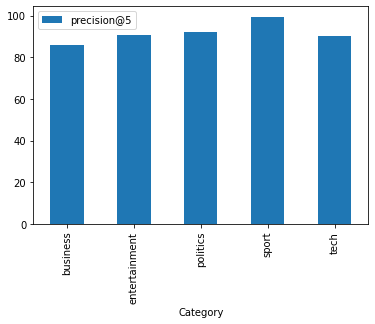

In [37]:
df_p5 = pd.DataFrame.from_dict(p5_2,orient='index', columns=['precision@5'])

df_p5["Category"] =  test_category_names

d_2 = df_p5.set_index("Category")

d_2.plot.bar()

In [38]:
mejora = []
for i in range(len(np.array(d))):
    mejora.append(d_2.iloc[i]-d.iloc[i])
mejora_df = pd.DataFrame(mejora,columns=['precision@5'])
mejora_df

,precision@5
business,5.633803
entertainment,13.962264
politics,0.727273
sport,0.833333
tech,1.702128


Text(0.5, 1.0, 'Mejora')

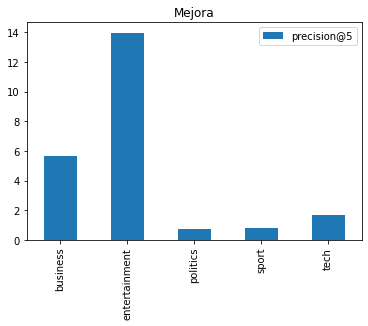

In [39]:
mejora_df.plot.bar()
                   
plt.title('Mejora') 

Como se puede apreciar en la gráfica anterior, la precisión mejora con respecto al modelo anterior (la mejora tiene un valor positivo) a la hora de recuperar textos de cualquier categoría. 

Las categorías que menos mejoran son aquellas que ya tenían una precisión relativamente alta (>88%) siendo estas 'politics', 'sport' y 'tech'. Todas ellas mejoran en menos de un 2%, a pesar de ello, 'sport' sigue siendo la categoría que el modelo mejor recupera con un 99.44% de efectividad.

Por otro lado las categoría que más mejoran con word-embeddings con respecto a la anterior vectorización es la de 'entertainment' con un 13.96% de incremento y 'business' con un incremento del 5.63% colocando a ambas por encima del 85% de precisión.

Se observa un aumento sustancial de la precisión del modelo sobre todo en aquellas categorías que el modelo con la anterior vectorización recuperaba peor. Esta mejora implica que ninguna categoría se recupere con una efectividad menor al 85% con word-embeddings mientras que en el caso anterior teníamos dos categorías con una precisión bastante baja lo que hace de este modelo más útil. Aún así pensamos que tendría que mejorar un poco más para llegar a ser realmente utilizable en un caso real.

A pesar de las diferencias con la anterior vectorización, podemos sacar conclusiones similares a las sacadas con el anterior modelo (y en la práctica 1) ya que 'sport' sigue siendo con diferencia la categoría que mejor recupera el modelo, aunque ahora encontramos a la cola la categoría 'business'.

## 4) Análisis de errores

Vamos a investigar los resultados para entender mejor dónde están fallando los procesos de recuperación. Sigue los siguientes pasos.


1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings
2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings
3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).
4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.


Puedes usar el código que calcula la intersección de términos que ponemos a continuación

---------
Como indicamos en el apartado anterior la categoría 'entertainment' es la que más mejora con word-embeddings por lo que vamos a intentar analizar porque sucede esto para algún ejeplo en concreto.

In [41]:
def terms_in_message(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    mensaje=vector_data[index,:]>0
    terminos_presentes = ma.array(feature_names, mask = ~(mensaje[0].toarray()))

    return set(terminos_presentes.compressed())

In [43]:
def precisions(X_train, y_train, X_test, y_test, k):
    '''Devuelve una lista con la precision de cada consulta.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    '''
    precisions = []
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        precisions.append((y_query,precision))
    
    return precisions

In [45]:
precisions_1 = precisions(train_preprocessed,train.Category, test_preprocessed, test.Category, 5)
precisions_2 = precisions(doc_embed_matrix_train,train.Category, doc_embed_matrix_test, test.Category, 5)

In [51]:
#Calculamos la posición de la consulta etiquetada como 'entertainment' cuya precisión 
#ha mejorado más con word-embeddings
maximo = 0
pos = 0
for i in range(len(precisions_1)):
    new = precisions_2[i][1]-precisions_1[i][1]
    if precisions_1[i][0] == 'entertainment' and new > maximo:
        maximo = new
        pos = i
pos

205

In [52]:
print(precisions_1[pos])
print(precisions_2[pos])

('entertainment', 0.0)
('entertainment', 100.0)


Observamos que existe una consulta donde el primer modelo (tf-idf puro) no ha recuperado ningún texto de la misma categoría que el consultado ('entertainment') mientras que con word-embeddings ha recuperado 5/5 de la misma categoría. A continuación mostramos el texto original de esta consulta y sus vectorizaciones.

In [55]:
test.iloc[pos].Text

'singer ian brown  in gig arrest  former stone roses singer ian brown was arrested after a fight during a concert in san francisco on tuesday  his spokesman has said.  a fan jumped on stage and attacked the singer  who then became involved in a fracas with a security guard  fiction records spokesman paul smernicki said. he said brown was arrested at his hotel after the show at the great american music hall but released without charge. san francisco police said they could find no record of his arrest. mr smernicki said he had been told a fan  rugby-tackled  the singer during the gig  which resulted in  pushing and shoving .  brown then got into a brawl with another man who tried to restrain him - without realising he was a security guard  mr smernicki added. the star went off for 15 minutes before returning to finish his set. police took witness statements and apprehended brown at his hotel  mr smernicki said. but he was released without charge and  as far as we re aware  that s the end

In [56]:
terms1 = terms_in_message(feature_names,test_preprocessed,pos)
terms2 = terms_in_message(feature_names_2,test_preprocessed_2,pos)
print(terms1)
print("-----------------------------------------------------")
print(terms2)

{'pushing', 'months', 'arrest', 'detained', 'department', 'star', 'jumped', 'man', 'resulted', 'ian', 'successful', 'split', 'police', 'set', 'stage', 'record', 'san', 'gig', 'records', 'attacked', 'said', 'released', 'singer', 'spokesman', 'stone', 's', 'witness', 'uk', 'charge', 'rock', 'hotel', 'security', 'solo', 'statements', 'told', 'bands', 'went', 'forged', 'captain', 'involved', 'singles', 'tackled', 'sentenced', 'scoring', 'lead', 'far', 'jail', 'arrested', 'paul', 'tuesday', 'using', 'end', 'fiction', 'francisco', 'took', 'finish', 'fight', 'realising', 'british', 'fan', 'aware', 'fracas', 'roses', 'got', 'added', 'shoving', 'returning', 'great', 'seminal', 'minutes', 'music', 'threatening', 'american', 'incident', 'mr', 'rugby', 'guard', 'hall', 'behaviour', 'career', 'brown', 'concert', 'spokesperson', 'tried'}
-----------------------------------------------------
{'pushing', 'months', 'arrest', 'detained', 'department', 'star', 'jumped', 'man', 'resulted', 'ian', '1998', 

In [57]:
t1_notint2 = [] #términos en la primera vectorización y no en la segunda
t2_notint1 = [] #términos en la segunda vectorización y no en la primera
for term in terms1:
    if term not in terms2:
        t1_notint2.append(term)
for term in terms2:
    if term not in terms1:
        t2_notint1.append(term)
print("Terms in first vectorization and not in second: ", t1_notint2)
print("-----------------------------------------------------")
print("Terms in second vectorization and not in first: ",t2_notint1)

Terms in first vectorization and not in second:  ['s']
-----------------------------------------------------
Terms in second vectorization and not in first:  ['1998', '30', '42', 'restrain', 'brawl', 'aeroplane', '15', 'stewardess', 'apprehended', '1996']


En la segunda vectorización observamos que se encuentran palabras como _restrain_, _brawl_, _apprehended_ o _stewardess_ y términos númericos, algunos de los cuales probablemente correspondan a fechas como _1998_ o _1996_, que no aparecen en la primera vectorización. Por otro lado el único término distinto en la primera vectorización es la letra _s_.

Se puede apreciar por tanto, que la información que encontramos en la segunda vectorización y no en la primera es mucho más útil y más numerosa que la que encontramos en la primera y no en la segunda.

In [60]:
idx = knn(test_preprocessed[pos], train_preprocessed, 5)
y_selected = np.take(train.Category, idx)
y_selected

ArticleId
613     politics
2060    politics
1690    politics
289     politics
1651    politics
Name: Category, dtype: object

In [62]:
idx = knn(doc_embed_matrix_test[pos], doc_embed_matrix_train, 5)
y_selected = np.take(train.Category, idx)
y_selected

ArticleId
479     entertainment
1603    entertainment
1093    entertainment
2110    entertainment
615     entertainment
Name: Category, dtype: object

Por alguna razón, el primer modelo recupera 5/5 textos categorizados como 'politics' en vez de como 'entertainment', lo que si sucede en el segundo modelo que lo hace correctamente. A continuación analizaremos algunos de estos textos para intentar dar explicación a este fenómeno.

In [63]:
#Buscamos la posición en la que se enuentran los textos que nos interesan
#en el conjunto de entrenamiento
wrong = 0
right = 0
for i in range(len(train)):
    if train.iloc[i].name == 613:
        wrong = i
    if train.iloc[i].name == 615:
        right = i

In [64]:
train.iloc[wrong]

Text        profile: gordon brown the ultimate prize of 10...
Category                                             politics
Name: 613, dtype: object

In [65]:
train.iloc[right]

Text        spears seeks aborted tour payment singer britn...
Category                                        entertainment
Name: 615, dtype: object

In [66]:
terms_wrong = terms_in_message(feature_names,train_preprocessed,wrong)
terms_right =  terms_in_message(feature_names_2,train_preprocessed_2,right)

In [67]:
intersection_wrong = []
for term in terms_wrong:
    if term in terms1:
        intersection_wrong.append(term)
print("Intersección entre consulta y primera noticia mal recuperada con td-idf puro: ", intersection_wrong)

Intersección entre consulta y primera noticia mal recuperada con td-idf puro:  ['said', 's', 'went', 'using', 'mr', 'career', 'brown', 'man', 'spokesman', 'far', 'record', 'took']


In [68]:
intersection_right = []
for term in terms_right:
    if term in terms2:
        intersection_right.append(term)
print("Intersección entre consulta y última noticia bien recuperada con td-idf y word-embeddings: ", intersection_right)

Intersección entre consulta y última noticia bien recuperada con td-idf y word-embeddings:  ['star', '30', 'said', 'singer', 'hotel', 'took', 'music', 'incident']


Como ya hemos indicado, la segunda vectorización parece que aportaba más información y a la vez con más significado que la primera.

Por otro lado analicemos la intersección entre los textos recuperados y la consulta que más ha mejorado con word-embeddings:

El primer texto erroneamente recuperado por el primer modelo tiene una vectorización con varios términos en común con el de la consulta. Si nos fijamos en estos términos, son o bastante genéricos o vocabulario que podría encontrarse tanto en 'politics' (categoría del texto recuperado) como en 'entertainment' (categoría de la consulta). _Said_, _went_, o _took_ son ejemplos de verbos que podemos encontrar en todo tipo de textos, mientras que _career_ es una palabra que podría referirse tanto a la carrera de un político como a la de un artista y podría ser frecuente encontrarla en ambos tipos de texto.

En el último texto recuperado correctamente por el segundo modelo encontramos términos que conforman un vocabulario más específico de la categoría 'entertainment' como _star_, _singer_ o _music_.

De lo anterior podemos sacar algunas conclusiones de por qué el segundo modelo tiene una mejor precisión. El primer modelo recupera textos similares en cuanto a la frecuencia de aparición de palabras comunes lo cual ofrece una funcionamiento relativamente bueno. Sin embargo el segundo modelo tiene también en cuenta la proximidad semántica de las palabras lo que resulta en un mejor rendimiento a la hora de recuperar textos de la misma categoría.